In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay, auc
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv('../DATA/nan_remove_data.csv')
x = data.drop('Diabetes_012', axis=1)
y = data['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
lab = LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)


In [3]:
lr = RandomizedSearchCV(LogisticRegression(penalty='l1', solver='saga'),
                        {'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
                         'warm_start': [True, False],
                         'multi_class': ['ovr', 'multinomial'],
                         },
                         n_iter=10,
                         n_jobs=4,
                         scoring='f1_micro',
                         random_state=71
                         ).fit(X_train, y_train)


[4.20460465e-01 5.50169565e-01 7.31518955e-01 4.12003454e+00
 0.00000000e+00 5.56909301e-02 2.06351055e-01 5.26075597e-02
 4.34814838e-02 1.64738029e-02 5.00786870e-01 4.52833864e-05
 5.99724676e-02 1.34766248e+00 4.85566391e-02 8.65660034e-02
 1.40380700e-01 2.12431781e-01 1.33829538e+00 9.81752336e-02
 3.76149015e-01]


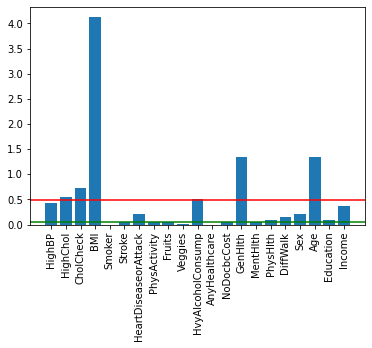

In [4]:
print(abs(lr.best_estimator_.coef_).max(axis=0))
plt.bar(x.columns, abs(lr.best_estimator_.coef_).max(axis=0))
plt.xticks(rotation=90)
plt.axhline(abs(lr.best_estimator_.coef_).max(axis=0).mean(), color='red')
plt.axhline(np.median(abs(lr.best_estimator_.coef_).mean(axis=0)), color='green')


In [5]:
med = np.median(abs(lr.best_estimator_.coef_).mean(axis=0))
useful_columns = x.columns.to_numpy()[abs(lr.best_estimator_.coef_).max(axis=0) >= -1]
useful_columns


array(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'], dtype=object)

In [6]:
data[np.append(useful_columns.tolist(), 'Diabetes_012')].to_csv('../DATA/regression_remove_data.csv', index=False)
